In [7]:
import pandas as pd

# Read only the 'author' column from the CSV file for memory efficiency
df = pd.read_csv('youtube_fussball_comments.csv', usecols=['author'])

# Display the first few rows
print("First 5 authors:")
print(df.head())

# Count total and unique authors
total_authors = len(df)
unique_authors = df['author'].nunique()
print(f"\nTotal comments: {total_authors}")
print(f"Unique authors: {unique_authors}")

# Save to a new CSV file with just the author column
output_file = 'authors_only.csv'
df.to_csv(output_file, index=False)
print(f"\nSaved author data to {output_file}")

First 5 authors:
               author
0            @Aslan46
1        @alekshe6908
2    @MichaelSchwenke
3    @MichaelSchwenke
4  @FrankfurtAller.99

Total comments: 91562
Unique authors: 61523

Saved author data to authors_only.csv


Original data preview:
   Unnamed: 0              name      demographic
0           0            author  US_35-44_female
1           1          @Aslan46    TR_25-34_male
2           2      @alekshe6908              NaN
3           3  @MichaelSchwenke              NaN
4           4  @MichaelSchwenke              NaN
Note: Found 3267 entries containing both 'male' and 'female'
These entries will be classified based on context priority (female takes precedence)

Classification results:
       demographic gender_class
0  US_35-44_female       female
1    TR_25-34_male         male
2              nan    undefined
3              nan    undefined
4              nan    undefined
5              nan    undefined
6              nan    undefined
7              nan    undefined
8              nan    undefined
9              nan    undefined

Gender classification counts:
gender_class
undefined    78544
male          9752
female        3267
Name: count, dtype: int64

Gender classification percentage

C:\Users\danie\AppData\Local\Temp\ipykernel_7468\1164807796.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender_class', data=df, palette='viridis')


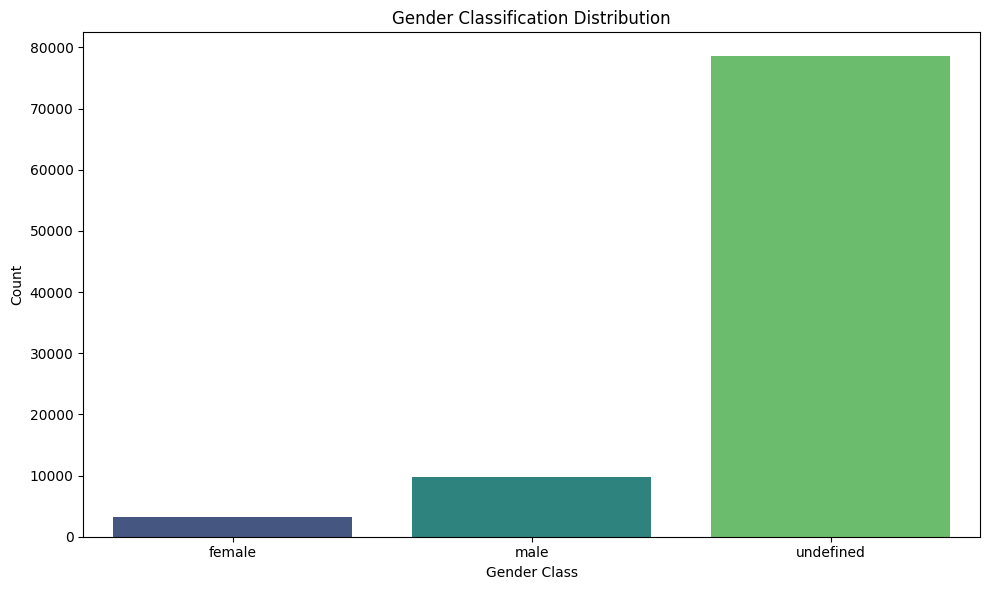

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file containing the prediction results
df = pd.read_csv('Prediction Result.csv')

# Display the first few rows to see the structure
print("Original data preview:")
print(df.head())

# Check if the demographic column exists
if 'demographic' not in df.columns:
    print("Error: 'demographic' column not found in the CSV file")
else:
    # Create a new column for the simplified classification
    df['gender_class'] = 'undefined'
    
    # Apply the classification rules:
    # 1. If 'demographic' contains 'male', classify as 'male'
    # 2. If 'demographic' contains 'female', classify as 'female'
    # 3. Otherwise, classify as 'undefined'
    
    # Convert demographic column to string type to ensure .str methods work
    df['demographic'] = df['demographic'].astype(str)
    
    # Apply the classification logic
    df.loc[df['demographic'].str.contains('male', case=False, na=False), 'gender_class'] = 'male'
    df.loc[df['demographic'].str.contains('female', case=False, na=False), 'gender_class'] = 'female'
    
    # Handle potential cases where both 'male' and 'female' are present
    # In this case, let's prioritize the longest matching string
    male_and_female = (df['demographic'].str.contains('male', case=False, na=False)) & \
                     (df['demographic'].str.contains('female', case=False, na=False))
    
    if male_and_female.any():
        print(f"Note: Found {male_and_female.sum()} entries containing both 'male' and 'female'")
        print("These entries will be classified based on context priority (female takes precedence)")
    
    # Display the results
    print("\nClassification results:")
    print(df[['demographic', 'gender_class']].head(10))
    
    # Count the occurrences of each class
    gender_counts = df['gender_class'].value_counts()
    print("\nGender classification counts:")
    print(gender_counts)
    
    # Calculate percentages
    gender_percentages = gender_counts / len(df) * 100
    print("\nGender classification percentages:")
    for gender, percentage in gender_percentages.items():
        print(f"{gender}: {percentage:.2f}%")
    
    # Create a visualization of the distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='gender_class', data=df, palette='viridis')
    plt.title('Gender Classification Distribution')
    plt.xlabel('Gender Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Optional: Save the results to a new CSV file
    # df.to_csv('gender_classified_results.csv', index=False)